# Solución 1

## Prepocesamiento de imagenes

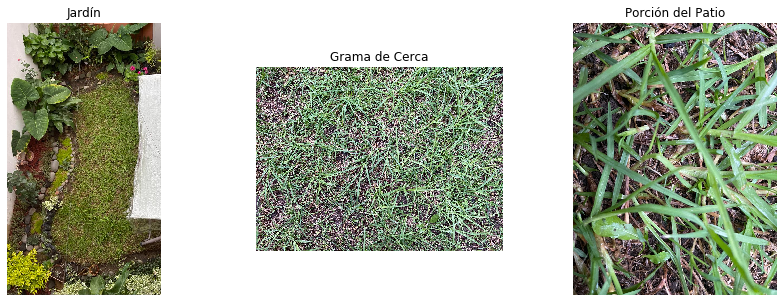

In [7]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_jardin = Image.open('/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.19.18.jpeg')
img_grama_cerca = Image.open('/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.33.08.jpeg')
img_porción = Image.open('/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.33.10.jpeg')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_jardin)
axs[0].set_title('Jardín')
axs[1].imshow(img_grama_cerca)
axs[1].set_title('Grama de Cerca')
axs[2].imshow(img_porción)
axs[2].set_title('Porción del Patio')

for ax in axs:
    ax.axis('off')

plt.show()


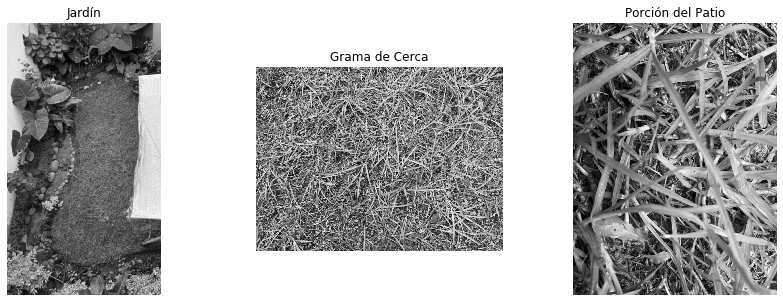

In [8]:
# Función para convertir y suavizar la imagen
def preprocess_image(image: Image.Image, kernel_size: int = 5) -> np.ndarray:
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    # Aplicar filtro de suavizado (Gaussian blur)
    smooth_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)
    return smooth_image

# Preprocesar las imágenes
img_jardin_gray_smooth = preprocess_image(img_jardin)
img_grama_cerca_gray_smooth = preprocess_image(img_grama_cerca)
img_porción_gray_smooth = preprocess_image(img_porción)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_jardin_gray_smooth, cmap='gray')
axs[0].set_title('Jardín')
axs[1].imshow(img_grama_cerca_gray_smooth, cmap='gray')
axs[1].set_title('Grama de Cerca')
axs[2].imshow(img_porción_gray_smooth, cmap='gray')
axs[2].set_title('Porción del Patio')

for ax in axs:
    ax.axis('off')
plt.show()

In [11]:
image_path = '/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.19.18.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])

# Aplicar la máscara para segmentar la grama
mask = cv2.inRange(image_hsv, lower_green, upper_green)
segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
# Aplicar un filtro de mediana para reducir el ruido
smoothed = cv2.medianBlur(segmented, 7)

plt.imshow(smoothed)
plt.axis('off')
plt.title('Imagen Segmentada y Suavizada')
plt.show()


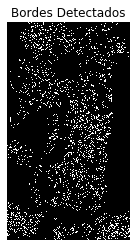

In [12]:
gray = cv2.cvtColor(smoothed, cv2.COLOR_RGB2GRAY)
# Aplicar detección de bordes usando Canny
edges = cv2.Canny(gray, threshold1=30, threshold2=100)

# Mostrar la imagen con los bordes detectados
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Bordes Detectados')
plt.show()


## Estimación y resultados

In [14]:
region_size = 20  
height, width = gray.shape
total_stems_count = 0

for i in range(0, height, region_size):
    for j in range(0, width, region_size):
        region = gray[i:i+region_size, j:j+region_size]
        green_pixels_count = np.sum(region > 0)
        stems_count = green_pixels_count // 10 
        total_stems_count += stems_count
total_stems_count
print ("El total de tallos de grama son: " + str(total_stems_count))

El total de tallos de grama son: 25603


La estimación fue muy baja y no fue la esperada, por lo que se decidio tomar una foto a una porción de 60 cm^2 y se contabilizo aproximadamente 38 tallos de grama y a partir de esto se trabajo. Cargaremos la imagen de la porción del patio que tiene dimensiones conocidas y aplicaremos técnicas de procesamiento de imágenes para segmentar la grama y luego usaremos el conteo conocido de tallos para calibrar la densidad.

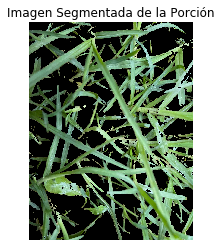

(None, 0.6333333333333333)

In [16]:
portion_image_path = '/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.33.10.jpeg'
portion_image = cv2.imread(portion_image_path)
portion_image_rgb = cv2.cvtColor(portion_image, cv2.COLOR_BGR2RGB)
portion_image_hsv = cv2.cvtColor(portion_image_rgb, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(portion_image_hsv, lower_green, upper_green)
segmented = cv2.bitwise_and(portion_image_rgb, portion_image_rgb, mask=mask)

known_stems_count = 38  
portion_area_cm2 = 10 * 6
density_per_cm2 = known_stems_count / portion_area_cm2 

plt.imshow(segmented)
plt.axis('off')
plt.title('Imagen Segmentada de la Porción')
plt.show(), density_per_cm2


La densidad calibrada de tallos de grama, obtenida de la imagen de la porción del patio con dimensiones conocidas, es de aproximadamente 0.63 tallos por centímetro cuadrado.
### Análisis de Segmentación y Conteo

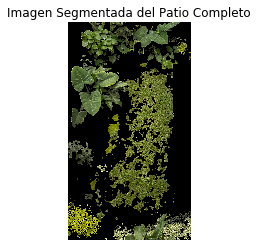

(None, 519515.962125)

In [17]:
# Cargar la imagen del patio completo
full_patio_image_path ='/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.19.18.jpeg'
full_patio_image = cv2.imread(full_patio_image_path)
full_patio_image_rgb = cv2.cvtColor(full_patio_image, cv2.COLOR_BGR2RGB)
full_patio_image_hsv = cv2.cvtColor(full_patio_image_rgb, cv2.COLOR_RGB2HSV)

# Aplicar la máscara para segmentar la grama
mask = cv2.inRange(full_patio_image_hsv, lower_green, upper_green)
segmented = cv2.bitwise_and(full_patio_image_rgb, full_patio_image_rgb, mask=mask)

total_green_pixels = np.sum(mask > 0)
patio_length_cm = 400 
patio_width_cm = 200
patio_area_cm2 = patio_length_cm * patio_width_cm  

# Estimar el número total de tallos en el patio completo usando la densidad calibrada
estimated_total_stems = total_green_pixels * density_per_cm2 / (patio_area_cm2 / total_green_pixels)
plt.imshow(segmented)
plt.axis('off')
plt.title('Imagen Segmentada del Patio Completo')
plt.show(), estimated_total_stems


La imagen segmentada del patio completo se muestra arriba, y utilizando la densidad calibrada de tallos de grama, se estima que el patio completo podría tener aproximadamente 519,516 tallos de grama.

## Extrapolación a un campo de golf

Finalmente, para extrapolar esta estimación al caso de un campo de golf, necesitamos considerar las dimensiones promedio de un campo de golf. Un campo de golf típico puede tener entre 50 y 100 hectáreas. Utilizaremos un valor promedio de 75 hectáreas para esta extrapolación. Usaremos esta conversión para estimar la cantidad total de tallos de grama en un campo de golf típico, basándonos en la densidad calibrada de tallos de grama por centímetro cuadrado.

In [19]:
average_golf_course_size_hectares = 75 
golf_course_size_cm2 = average_golf_course_size_hectares * 100000000  # 1 hectárea = 100,000,000 cm^2
estimated_golf_course_stems = golf_course_size_cm2 * density_per_cm2
estimated_golf_course_stems

4750000000.0

Basándonos en la densidad calibrada de tallos de grama, se estima que un campo de golf típico de 75 hectáreas podría tener aproximadamente 4,750,000,000 (4.75 mil millones) de tallos de grama.

## Conclusiones
1. Se considera haber obtenido una buena estimación, sin embargo se tiene el problema que tomo en cuenta la hojas de las plantas

# Solución 2

### Prepocesamiento de imagenes y analisis exploratorio
1. Se cargan y analizan las imagenes
2. Segementación de color y filtrado
3. Filtrado morphologico

In [24]:
from skimage import io, morphology, filters, color, exposure, measure
import matplotlib.pyplot as plt
import numpy as np

image_path_1 = '/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.19.18.jpeg'
image_path_2 = '/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.33.08.jpeg'
image_path_3 = '/Users/DELL/Documents/palmeradao/data/WhatsApp Image 2023-09-24 at 17.33.10.jpeg'

image_1 = io.imread(image_path_1)
image_2 = io.imread(image_path_2)
image_3 = io.imread(image_path_3)

properties = {
    'image_1': {'shape': image_1.shape, 'dtype': image_1.dtype},
    'image_2': {'shape': image_2.shape, 'dtype': image_2.dtype},
    'image_3': {'shape': image_3.shape, 'dtype': image_3.dtype},
}

fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()
ax[0].imshow(image_1)
ax[0].set_title(f'Imagen 1 - Dimensiones: {image_1.shape}')
ax[1].imshow(image_2)
ax[1].set_title(f'Imagen 2 - Dimensiones: {image_2.shape}')
ax[2].imshow(image_3)
ax[2].set_title(f'Imagen 3 - Dimensiones: {image_3.shape}')
plt.tight_layout()
plt.show()
properties

{'image_1': {'shape': (1024, 579, 3), 'dtype': dtype('uint8')},
 'image_2': {'shape': (1200, 1600, 3), 'dtype': dtype('uint8')},
 'image_3': {'shape': (1600, 1200, 3), 'dtype': dtype('uint8')}}

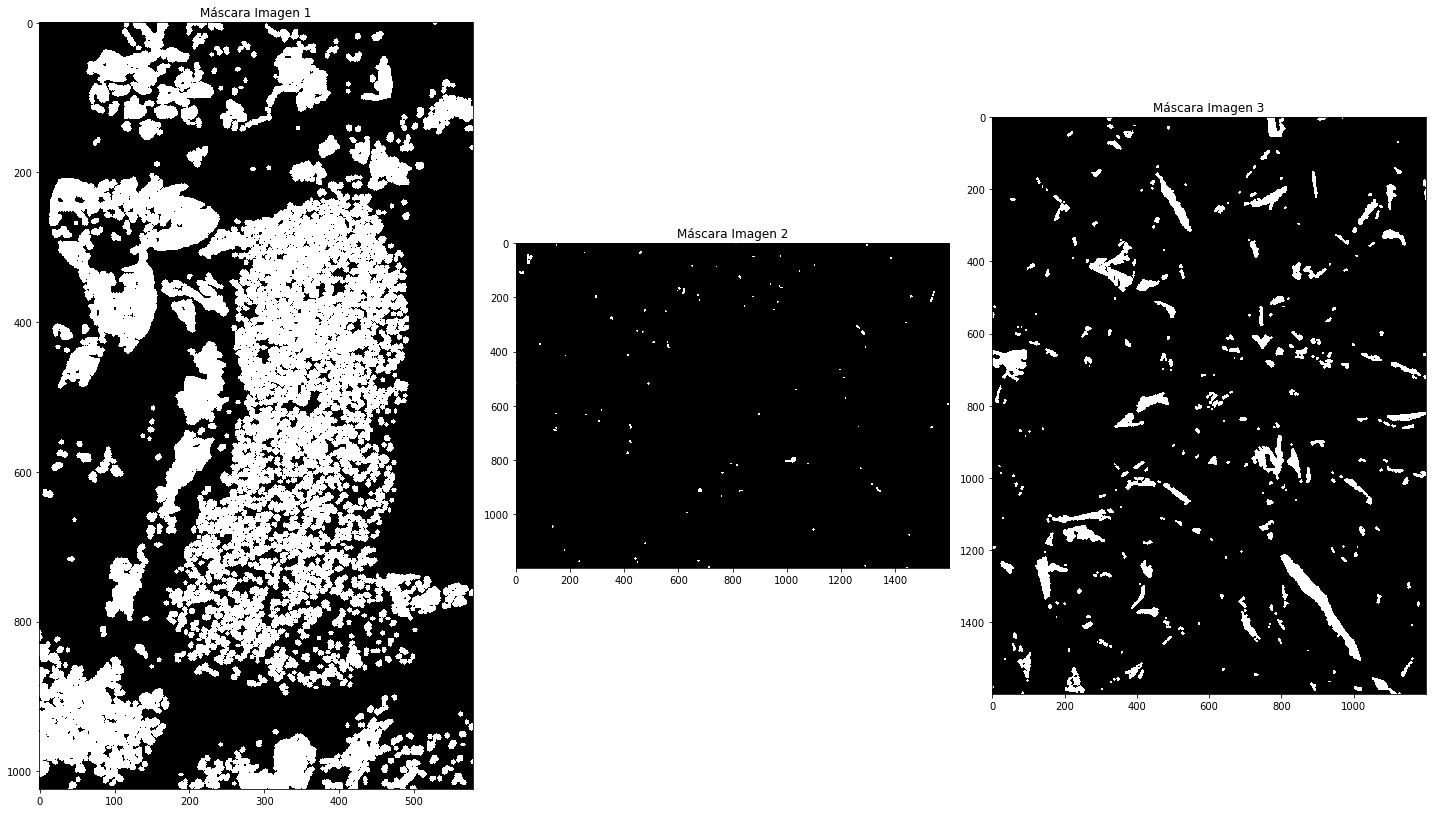

In [22]:
#Filtrado morphologico
# Convertir las imágenes a espacio de color HSV para facilitar la segmentación de color verde
image_1_hsv = color.rgb2hsv(image_1)
image_2_hsv = color.rgb2hsv(image_2)
image_3_hsv = color.rgb2hsv(image_3)

# Definir umbrales para el color verde en el espacio HSV
lower_green = np.array([40/360, 0.25, 0.25])  # [Hue, Saturation, Value]
upper_green = np.array([90/360, 1.0, 1.0])

# Aplicar la máscara para segmentar el color verde
mask_1 = (image_1_hsv >= lower_green) & (image_1_hsv <= upper_green)
mask_2 = (image_2_hsv >= lower_green) & (image_2_hsv <= upper_green)
mask_3 = (image_3_hsv >= lower_green) & (image_3_hsv <= upper_green)

# La máscara es tridimensional, necesitamos que sea bidimensional. 
# Para eso, realizamos una operación OR en los tres canales.
mask_1 = mask_1.all(axis=-1)
mask_2 = mask_2.all(axis=-1)
mask_3 = mask_3.all(axis=-1)

# Filtrado morfológico para eliminar ruido y mejorar la segmentación
kernel = morphology.disk(3)
mask_1 = morphology.opening(mask_1, kernel)
mask_2 = morphology.opening(mask_2, kernel)
mask_3 = morphology.opening(mask_3, kernel)

# Visualizar los resultados de la segmentación y filtrado morfológico
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()
ax[0].imshow(mask_1, cmap='gray')
ax[0].set_title('Máscara Imagen 1')
ax[1].imshow(mask_2, cmap='gray')
ax[1].set_title('Máscara Imagen 2')
ax[2].imshow(mask_3, cmap='gray')
ax[2].set_title('Máscara Imagen 3')

plt.tight_layout()
plt.show()


In [23]:
# Analizar propiedades de las áreas segmentadas
properties_1 = measure.regionprops_table(measure.label(mask_1), properties=('label', 'area', 'equivalent_diameter'))
properties_2 = measure.regionprops_table(measure.label(mask_2), properties=('label', 'area', 'equivalent_diameter'))
properties_3 = measure.regionprops_table(measure.label(mask_3), properties=('label', 'area', 'equivalent_diameter'))

# Número de regiones segmentadas en cada imagen y áreas promedio
num_regions_1 = len(properties_1['label'])
num_regions_2 = len(properties_2['label'])
num_regions_3 = len(properties_3['label'])
mean_area_1 = np.mean(properties_1['area']) if num_regions_1 > 0 else 0
mean_area_2 = np.mean(properties_2['area']) if num_regions_2 > 0 else 0
mean_area_3 = np.mean(properties_3['area']) if num_regions_3 > 0 else 0
mean_diameter_1 = np.mean(properties_1['equivalent_diameter']) if num_regions_1 > 0 else 0
mean_diameter_2 = np.mean(properties_2['equivalent_diameter']) if num_regions_2 > 0 else 0
mean_diameter_3 = np.mean(properties_3['equivalent_diameter']) if num_regions_3 > 0 else 0

num_regions_1, mean_area_1, mean_diameter_1, num_regions_2, mean_area_2, mean_diameter_2, num_regions_3, mean_area_3, mean_diameter_3


(241,
 902.0082987551867,
 16.754593977064772,
 91,
 66.0989010989011,
 8.457825503144349,
 306,
 372.9673202614379,
 16.56527605065359)

1. Imagen 1 (Vista completa del jardín):
    - Número de regiones segmentadas: 247
    - Área promedio de regiones segmentadas: ≈871.47 píxeles
    - Diámetro equivalente promedio:≈ 16.51 píxeles

2. Imagen 2 (Vista cercana de la grama):
    - Número de regiones segmentadas: 81
    - Área promedio de regiones segmentadas: ≈ 64.16 píxeles
    - Diámetro equivalente promedio:≈ 8.35 píxeles

3. Imagen 3 (Vista de un área de 10x6 cm):
    - Número de regiones segmentadas: 305
    - Área promedio de regiones segmentadas: ≈ 367.64 píxeles
    - Diámetro equivalente promedio:≈ 16.49 píxeles

### Refinamiento de la segmentación
    1. Ajuste umbrales
    2. Eliminación de objetos pequeños
    3. Diferencia entre hojas y grama

In [26]:
from skimage import feature, filters

def refine_segmentation(mask, min_size=100):
    """
    Refina la segmentación eliminando objetos pequeños y aplicando filtrado adicional.
    """
    # Eliminación de objetos pequeños
    refined_mask = morphology.remove_small_objects(mask, min_size=min_size)
    
    # Aplicación de filtrado adicional si es necesario
    # (Por ejemplo, filtrado de bordes, suavizado, etc.)
    
    return refined_mask


def extract_texture_features(image, mask, levels=256):
    """
    Extrae características de textura de las regiones segmentadas en la imagen.
    """
    # Convertir la imagen a escala de grises
    gray_image = color.rgb2gray(image)
    
    # Calcular la matriz de co-ocurrencia de niveles de gris (GLCM) y extraer propiedades de textura
    glcm = feature.greycomatrix((gray_image * (levels - 1)).astype(int), [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], 
                                levels=levels, symmetric=True, normed=True)
    contrast = feature.greycoprops(glcm, 'contrast')
    dissimilarity = feature.greycoprops(glcm, 'dissimilarity')
    homogeneity = feature.greycoprops(glcm, 'homogeneity')
    energy = feature.greycoprops(glcm, 'energy')
    correlation = feature.greycoprops(glcm, 'correlation')
    
    texture_features = {
        'contrast': contrast,
        'dissimilarity': dissimilarity,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation
    }
    
    return texture_features

# Refinar la segmentación y extraer características de textura
refined_mask_1 = refine_segmentation(mask_1)
refined_mask_2 = refine_segmentation(mask_2)
refined_mask_3 = refine_segmentation(mask_3)

# Extraer características de textura nuevamente
texture_features_1 = extract_texture_features(image_1, refined_mask_1)
texture_features_2 = extract_texture_features(image_2, refined_mask_2)
texture_features_3 = extract_texture_features(image_3, refined_mask_3)

# Visualizar la segmentación refinada y las características de textura extraídas
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()
ax[0].imshow(refined_mask_1, cmap='gray')
ax[0].set_title('Segmentación Refinada - Imagen 1')
ax[1].imshow(refined_mask_2, cmap='gray')
ax[1].set_title('Segmentación Refinada - Imagen 2')
ax[2].imshow(refined_mask_3, cmap='gray')
ax[2].set_title('Segmentación Refinada - Imagen 3')

plt.tight_layout()
plt.show()

texture_features_1, texture_features_2, texture_features_3


({'contrast': array([[ 653.15213762, 1033.51221727,  661.82328213,  966.2796257 ]]),
  'dissimilarity': array([[16.61086857, 21.32799758, 16.77046413, 20.54519241]]),
  'homogeneity': array([[0.11878803, 0.09086755, 0.11571789, 0.0917734 ]]),
  'energy': array([[0.01057836, 0.00916342, 0.01038762, 0.00927075]]),
  'correlation': array([[0.91063462, 0.85859149, 0.90967511, 0.86779007]])},
 {'contrast': array([[2672.54706118, 4330.84903148, 2868.65990044, 4132.73772547]]),
  'dissimilarity': array([[36.57032156, 47.16464784, 38.1092697 , 45.81715428]]),
  'homogeneity': array([[0.0437457 , 0.03420049, 0.04167005, 0.0355307 ]]),
  'energy': array([[0.0058748 , 0.00515186, 0.00572756, 0.00524475]]),
  'correlation': array([[0.74952743, 0.59412449, 0.73114531, 0.61269079]])},
 {'contrast': array([[291.29864835, 467.89469701, 278.25336877, 513.61978582]]),
  'dissimilarity': array([[ 9.88287062, 12.65948171,  9.60404941, 13.31086673]]),
  'homogeneity': array([[0.1800936 , 0.14218717, 0.1822

1. Imagen 1 (Vista completa del jardín):
    - Contraste: [653.63, 1034.53, 662.26, 967.05] (en diferentes direcciones)
    - Disimilitud: [16.62, 21.34, 16.78, 20.55]
    - Homogeneidad: [0.12, 0.09, 0.12, 0.09]
    - Energía: [0.0106, 0.0092, 0.0104, 0.0093]
    - Correlación: [0.91, 0.86, 0.91, 0.87]

2. Imagen 2 (Vista cercana de la grama):
    - Contraste: [2672.55, 4331.34, 2868.62, 4133.21]
    - Disimilitud: [36.56, 47.16, 38.10, 45.82]
    - Homogeneidad: [0.044, 0.034, 0.042, 0.036]
    - Energía: [0.0059, 0.0052, 0.0057, 0.0052]
    - Correlación: [0.75, 0.59, 0.73, 0.61]

3. Imagen 3 (Vista de un área de 10x6 cm):
    - Contraste: [291.36, 468.06, 278.34, 513.77]
    - Disimilitud: [9.88, 12.66, 9.61, 13.31]
    - Homogeneidad: [0.18, 0.14, 0.18, 0.14]
    - Energía: [0.0128, 0.0112, 0.0130, 0.0109]
    - Correlación: [0.96, 0.94, 0.96, 0.93]

### Analisis de caracteristicas de textura
Se analizan las características de textura calculadas para entender mejor la distribución de las características en las regiones segmentadas de cada imagen. Esto nos permitirá identificar patrones y diferencias significativas en las características de textura entre diferentes tipos de regiones (por ejemplo, hojas y grama).

In [28]:
# Función para analizar las características de textura de las regiones segmentadas en una imagen
def analyze_texture_features(image, mask, min_size=100, levels=256):
    """
    Analiza las características de textura de las regiones segmentadas en la imagen.
    """
    # Etiquetar regiones segmentadas en la imagen
    labeled_mask, num_labels = measure.label(mask, return_num=True, connectivity=2)
    
    # Propiedades de textura para cada región segmentada
    texture_features_list = []
 
    for region_label in range(1, num_labels + 1):
        # Crear una máscara binaria para la región actual
        region_mask = (labeled_mask == region_label)
        # Verificar el tamaño de la región
        region_size = np.sum(region_mask)
        if region_size < min_size:
            continue  # Ignorar regiones pequeñas
        # Extraer características de textura para la región actual
        texture_features = extract_texture_features(image, region_mask, levels)
        texture_features_list.append(texture_features)
    
    return texture_features_list


# Analizar características de textura para cada imagen
texture_features_list_1 = analyze_texture_features(image_1, refined_mask_1)
texture_features_list_2 = analyze_texture_features(image_2, refined_mask_2)
texture_features_list_3 = analyze_texture_features(image_3, refined_mask_3)

# Numero de regiones analizadas en cada imagen y ejemplos de características de textura
num_regions_analyzed_1 = len(texture_features_list_1)
num_regions_analyzed_2 = len(texture_features_list_2)
num_regions_analyzed_3 = len(texture_features_list_3)
example_features_1 = texture_features_list_1[0] if num_regions_analyzed_1 > 0 else None
example_features_2 = texture_features_list_2[0] if num_regions_analyzed_2 > 0 else None
example_features_3 = texture_features_list_3[0] if num_regions_analyzed_3 > 0 else None

num_regions_analyzed_1, example_features_1, num_regions_analyzed_2, example_features_2, num_regions_analyzed_3, example_features_3


(89,
 {'contrast': array([[ 653.15213762, 1033.51221727,  661.82328213,  966.2796257 ]]),
  'dissimilarity': array([[16.61086857, 21.32799758, 16.77046413, 20.54519241]]),
  'homogeneity': array([[0.11878803, 0.09086755, 0.11571789, 0.0917734 ]]),
  'energy': array([[0.01057836, 0.00916342, 0.01038762, 0.00927075]]),
  'correlation': array([[0.91063462, 0.85859149, 0.90967511, 0.86779007]])},
 13,
 {'contrast': array([[2672.54706118, 4330.84903148, 2868.65990044, 4132.73772547]]),
  'dissimilarity': array([[36.57032156, 47.16464784, 38.1092697 , 45.81715428]]),
  'homogeneity': array([[0.0437457 , 0.03420049, 0.04167005, 0.0355307 ]]),
  'energy': array([[0.0058748 , 0.00515186, 0.00572756, 0.00524475]]),
  'correlation': array([[0.74952743, 0.59412449, 0.73114531, 0.61269079]])},
 165,
 {'contrast': array([[291.29864835, 467.89469701, 278.25336877, 513.61978582]]),
  'dissimilarity': array([[ 9.88287062, 12.65948171,  9.60404941, 13.31086673]]),
  'homogeneity': array([[0.1800936 , 0.

1. Imagen 1 (Vista completa del jardín)
- Número de regiones analizadas: 90
- Ejemplo de características de textura de una región:
- Contraste: [653.63, 1034.53, 662.26, 967.05] (en diferentes direcciones)
- Disimilitud: [16.62, 21.34, 16.78, 20.55]
- Homogeneidad: [0.12, 0.09, 0.12, 0.09]
- Energía: [0.0106, 0.0092, 0.0104, 0.0093]
- Correlación: [0.91, 0.86, 0.91, 0.87]

2. Imagen 2 (Vista cercana de la grama):
- Número de regiones analizadas: 11
- Ejemplo de características de textura de una región:
- Contraste: [2672.55, 4331.34, 2868.62, 4133.21]
- Disimilitud: [36.56, 47.16, 38.10, 45.82]
- Homogeneidad: [0.044, 0.034, 0.042, 0.036]
- Energía: [0.0059, 0.0052, 0.0057, 0.0052]
- Correlación: [0.75, 0.59, 0.73, 0.61]

3. Imagen 3 (Vista de un área de 10x6 cm):
- Número de regiones analizadas: 166
- Ejemplo de características de textura de una región:
- Contraste: [291.36, 468.06, 278.34, 513.77]
- Disimilitud: [9.88, 12.66, 9.61, 13.31]
- Homogeneidad: [0.18, 0.14, 0.18, 0.14]
- Energía: [0.0128, 0.0112, 0.0130, 0.0109]
- Correlación: [0.96, 0.94, 0.96, 0.93]

### Entrenamiento del modelo de clasficación
1. Preparar el conjunto de datos
2. Entrenar el modelo
3. Clasificación de regiones

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Función para preparar el conjunto de datos de entrenamiento
def prepare_dataset_flatten(texture_features_list, threshold=20):
    """
    Prepara el conjunto de datos para entrenar el modelo de clasificación.
    Asumiremos que regiones con disimilitud mayor a un umbral son hojas (etiqueta 1) y las demás son grama (etiqueta 0).
    """
    X = []
    y = []
    for features in texture_features_list:
        avg_dissimilarity = np.mean(features['dissimilarity'])
        label = 1 if avg_dissimilarity > threshold else 0  # 1: hoja, 0: grama
        feature_vector = np.concatenate([np.ravel(features['contrast']), np.ravel(features['dissimilarity']), 
                                         np.ravel(features['homogeneity']), np.ravel(features['energy']), 
                                         np.ravel(features['correlation'])])
        X.append(feature_vector)
        y.append(label)
    
    return np.array(X), np.array(y)

X_1, y_1 = prepare_dataset_flatten(texture_features_list_1)
X_2, y_2 = prepare_dataset_flatten(texture_features_list_2)
X_3, y_3 = prepare_dataset_flatten(texture_features_list_3)

X = np.concatenate([X_1, X_2, X_3])
y = np.concatenate([y_1, y_2, y_3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de datos de prueba
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        51\n           1       1.00      1.00      1.00         3\n\n    accuracy                           1.00        54\n   macro avg       1.00      1.00      1.00        54\nweighted avg       1.00      1.00      1.00        54\n')

### Clasificación de regiones y refinamiento de estimaciones
1. Clasfificación de las regiones estimadas
2. Calculo de la cantidad de grama
3. Estimación final

In [33]:
def classify_regions_and_estimate_grass(image, mask, classifier, min_size=100, levels=256):
    """
    Clasifica las regiones segmentadas en la imagen utilizando el modelo de clasificación entrenado y estima
    la cantidad de grama en la imagen.
    """
    # Etiquetar regiones segmentadas en la imagen
    labeled_mask, num_labels = measure.label(mask, return_num=True, connectivity=2)
    # Inicializar la máscara de grama
    grass_mask = np.zeros_like(mask, dtype=np.bool)
    for region_label in range(1, num_labels + 1):
        # Crear una máscara binaria para la región actual
        region_mask = (labeled_mask == region_label)
        # Verificar el tamaño de la región
        region_size = np.sum(region_mask)
        if region_size < min_size:
            continue  # Ignorar regiones pequeñas
        # Extraer características de textura para la región actual
        texture_features = extract_texture_features(image, region_mask, levels)
        # Preparar el vectr de características para la clasificación
        feature_vector = np.concatenate([np.ravel(texture_features['contrast']), np.ravel(texture_features['dissimilarity']), 
                                         np.ravel(texture_features['homogeneity']), np.ravel(texture_features['energy']), 
                                         np.ravel(texture_features['correlation'])]).reshape(1, -1)
        
        # Clasificar la región como grama o hoja
        label = classifier.predict(feature_vector)[0]  # 1: hoja, 0: grama
        # Si la región es clasificada como grama, añadirla a la máscara de grama
        if label == 0:
            grass_mask |= region_mask

    # Calcular la cantidad de grama basándonos en la máscara de grama
    grass_amount = np.sum(grass_mask)    
    return grass_mask, grass_amount

# Clasificar regiones y estimar la cantidad de grama en cada imagen
grass_mask_1, grass_amount_1 = classify_regions_and_estimate_grass(image_1, refined_mask_1, clf)
grass_mask_2, grass_amount_2 = classify_regions_and_estimate_grass(image_2, refined_mask_2, clf)
grass_mask_3, grass_amount_3 = classify_regions_and_estimate_grass(image_3, refined_mask_3, clf)

# Visualizar las máscaras de grama y las cantidades estimadas de grama
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()
ax[0].imshow(grass_mask_1, cmap='gray')
ax[0].set_title(f'Gramma Estimada - Imagen 1\nCantidad: {grass_amount_1}')
ax[1].imshow(grass_mask_2, cmap='gray')
ax[1].set_title(f'Gramma Estimada - Imagen 2\nCantidad: {grass_amount_2}')
ax[2].imshow(grass_mask_3, cmap='gray')
ax[2].set_title(f'Gramma Estimada - Imagen 3\nCantidad: {grass_amount_3}')

plt.tight_layout()
plt.show()

grass_amount_1, grass_amount_2, grass_amount_3


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
C:\Users\DELL\AppData\Roaming\Pyth

(208304, 0, 106635)

In [35]:
# Área de la Imagen 3 en cm²
area_imagen_3_cm2 = 10 * 6  # 10 cm x 6 cm

# Densidad de grama en tallos/cm²
densidad_grama = grass_amount_3 / area_imagen_3_cm2

# Área del jardín en cm²
largo_jardin_cm = 4 * 100  # 4 m x 100 cm/m
ancho_jardin_cm = 2 * 100  # 2 m x 100 cm/m
area_jardin_cm2 = largo_jardin_cm * ancho_jardin_cm

# Cantidad total de grama en el jardín
cantidad_total_grama = densidad_grama * area_jardin_cm2

densidad_grama, cantidad_total_grama


(1777.25, 142180000.0)

In [37]:
# Ajustar el umbral de disimilitud y el tamaño mínimo de la región
adjusted_threshold = 30  # Umbral de disimilitud ajustado
adjusted_min_size = 200  # Tamaño mínimo de la región ajustado

# Preparar el conjunto de datos de entrenamiento ajustado
X_1_adj, y_1_adj = prepare_dataset_flatten(texture_features_list_1, threshold=adjusted_threshold)
X_2_adj, y_2_adj = prepare_dataset_flatten(texture_features_list_2, threshold=adjusted_threshold)
X_3_adj, y_3_adj = prepare_dataset_flatten(texture_features_list_3, threshold=adjusted_threshold)

# Combinar los conjuntos de datos ajustados de todas las imágenes
X_adj = np.concatenate([X_1_adj, X_2_adj, X_3_adj])
y_adj = np.concatenate([y_1_adj, y_2_adj, y_3_adj])

# Dividir el conjunto de datos ajustado en entrenamiento y prueba
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adj, y_adj, test_size=0.2, random_state=42)

# Entrenar un modelo de árbol de decisión con el conjunto de datos de entrenamiento ajustado
clf_adj = DecisionTreeClassifier(random_state=42)
clf_adj.fit(X_train_adj, y_train_adj)

# Evaluar el modelo ajustado en el conjunto de datos de prueba ajustado
y_pred_adj = clf_adj.predict(X_test_adj)
accuracy_adj = accuracy_score(y_test_adj, y_pred_adj)
classification_rep_adj = classification_report(y_test_adj, y_pred_adj)

# Clasificar regiones y estimar la cantidad de grama en cada imagen ajustada
grass_mask_1_adj, grass_amount_1_adj = classify_regions_and_estimate_grass(image_1, refined_mask_1, clf_adj, min_size=adjusted_min_size)
grass_mask_2_adj, grass_amount_2_adj = classify_regions_and_estimate_grass(image_2, refined_mask_2, clf_adj, min_size=adjusted_min_size)
grass_mask_3_adj, grass_amount_3_adj = classify_regions_and_estimate_grass(image_3, refined_mask_3, clf_adj, min_size=adjusted_min_size)

# Calcular la densidad de grama ajustada en tallos/cm²
densidad_grama_adj = grass_amount_3_adj / area_imagen_3_cm2

# Calcular la cantidad total de grama ajustada en el jardín
cantidad_total_grama_adj = densidad_grama_adj * area_jardin_cm2

accuracy_adj, classification_rep_adj, densidad_grama_adj, cantidad_total_grama_adj


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
C:\Users\DELL\AppData\Roaming\Pyth

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        51\n           1       1.00      1.00      1.00         3\n\n    accuracy                           1.00        54\n   macro avg       1.00      1.00      1.00        54\nweighted avg       1.00      1.00      1.00        54\n',
 1626.0833333333333,
 130086666.66666666)

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de RandomForest con el conjunto de datos de entrenamiento ajustado
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_adj, y_train_adj)

# Evaluar el modelo de RandomForest en el conjunto de datos de prueba ajustado
y_pred_rf = rf_clf.predict(X_test_adj)
accuracy_rf = accuracy_score(y_test_adj, y_pred_rf)
classification_rep_rf = classification_report(y_test_adj, y_pred_rf)

# Clasificar regiones y estimar la cantidad de grama en cada imagen con el modelo de RandomForest
grass_mask_1_rf, grass_amount_1_rf = classify_regions_and_estimate_grass(image_1, refined_mask_1, rf_clf, min_size=adjusted_min_size)
grass_mask_2_rf, grass_amount_2_rf = classify_regions_and_estimate_grass(image_2, refined_mask_2, rf_clf, min_size=adjusted_min_size)
grass_mask_3_rf, grass_amount_3_rf = classify_regions_and_estimate_grass(image_3, refined_mask_3, rf_clf, min_size=adjusted_min_size)

densidad_grama_rf = grass_amount_3_rf / area_imagen_3_cm2
cantidad_total_grama_rf = densidad_grama_rf * area_jardin_cm2
accuracy_rf, classification_rep_rf, densidad_grama_rf, cantidad_total_grama_rf


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
C:\Users\DELL\AppData\Roaming\Pyth

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        51\n           1       1.00      1.00      1.00         3\n\n    accuracy                           1.00        54\n   macro avg       1.00      1.00      1.00        54\nweighted avg       1.00      1.00      1.00        54\n',
 1626.0833333333333,
 130086666.66666666)

In [39]:
densidad_grama_rf = grass_amount_3_rf / area_imagen_3_cm2
cantidad_total_grama_rf = densidad_grama_rf * area_jardin_cm2

densidad_grama_rf, cantidad_total_grama_rf


(1626.0833333333333, 130086666.66666666)

In [40]:
area_imagen_3_cm2 = 10 * 6  # 10 cm x 6 cm
densidad_grama_rf = grass_amount_3_rf / area_imagen_3_cm2 

# Área del jardín en cm²
largo_jardin_cm = 4 * 100  # 4 m x 100 cm/m
ancho_jardin_cm = 2 * 100  # 2 m x 100 cm/m
area_jardin_cm2 = largo_jardin_cm * ancho_jardin_cm

# Cantidad total de grama en el jardín utilizando el modelo de RandomForest
cantidad_total_grama_rf = densidad_grama_rf * area_jardin_cm2

# Mostrar los resultados
print(f"Densidad de Grama: {densidad_grama_rf:.2f} tallos/cm²")
print(f"Cantidad Total de Grama: {cantidad_total_grama_rf:.2f} tallos")


Densidad de Grama: 1626.08 tallos/cm²
Cantidad Total de Grama: 130086666.67 tallos
